In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

sns.set(rc={'figure.figsize':(6,4)})

Error: Activating Python 3.7.4 64-bit ('base': conda) to run Jupyter failed with Error: Command failed: . /home/kongkip/anaconda3/bin/activate && conda activate base && echo 'e8b39361-0157-4923-80e1-22d70d46dee6' && python /home/kongkip/.vscode/extensions/ms-python.python-2020.2.64397/pythonFiles/printEnvVariables.py
/home/kongkip/anaconda3/bin/activate: line 1: syntax error near unexpected token `0,26460'
/home/kongkip/anaconda3/bin/activate: line 1: `np.linspace(0,26460)#!/bin/sh'
.

In [144]:
confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")
deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv")
recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv")

In [145]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,48,50,50,50,53,59,70,75,82,114
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,420,461,502,511,581,639,639,701,773,839
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,130,138,150,150,160,178,178,200,212,226
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,83,93,99,117,129,149,149,197,238,428


In [146]:
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,6,6,6,10,10,15,16,19,22,22
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [149]:
recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,...,31,31,31,31,33,34,34,35,35,35
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,...,46,76,76,76,101,118,118,118,118,118
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,78,78,78,78,78,96,96,97,105,105
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,22,23,24,24,24,26,26,26,35,42


In [277]:
confirmed["Country/Region"].unique()

array(['Thailand', 'Japan', 'Singapore', 'Nepal', 'Malaysia', 'Canada',
       'Australia', 'Cambodia', 'Sri Lanka', 'Germany', 'Finland',
       'United Arab Emirates', 'Philippines', 'India', 'Italy', 'Sweden',
       'Spain', 'Belgium', 'Egypt', 'Lebanon', 'Iraq', 'Oman',
       'Afghanistan', 'Bahrain', 'Kuwait', 'Algeria', 'Croatia',
       'Switzerland', 'Austria', 'Israel', 'Pakistan', 'Brazil',
       'Georgia', 'Greece', 'North Macedonia', 'Norway', 'Romania',
       'Estonia', 'Netherlands', 'San Marino', 'Belarus', 'Iceland',
       'Lithuania', 'Mexico', 'New Zealand', 'Nigeria', 'Ireland',
       'Luxembourg', 'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia', 'Morocco', 'Saudi Arabia', 'Senegal',
       'Argentina', 'Chile', 'Jordan', 'Ukraine', 'Hungary',
       'Liechtenstein', 'Poland', 'Tunisia', 'Bosnia and Herzegovina',
       'Slovenia', 'South Africa', 'Bhutan', 'Cameroon', 'Colo

In [162]:
# create a time series data
def prepare_data(case):
    """
    case:
        pandas data frame for either cofirmed/deaths/recovered
    """
    # select only the columns with time
    case_T = case[case.columns[-54:]].T 

     # set columns names to Country/Region
    case_T.columns = case["Country/Region"]

    # transform index to datetime
    case_T.index = pd.to_datetime(case_T.index) 

    # sum data of regions in the same country
    regions_count = pd.value_counts(confirmed["Country/Region"]).reset_index()
    regions_count.columns = ["Country/Region","Counts"]
    to_drop = list(regions_count[regions_count["Counts"]>1]["Country/Region"].values)
    case_T_copy = case_T.copy()
    case_T_copy = case_T_copy.drop(to_drop, axis=1)
    for i in to_drop:
        case_T_copy[i] = case_T[i].sum(axis=1)
    
    return case_T_copy

In [163]:
confirmed_prepared = prepare_data(confirmed)
deaths_prepared = prepare_data(deaths)
recovered_prepared = prepare_data(recovered)

In [207]:
#  filter data by country
def filter_by_country(country):
    country_all  = pd.DataFrame(
        data=
            confirmed_prepared[country].values,
        columns = [
            "Confirmed",
        ],
        index=confirmed_prepared.index
    )

    country_all["Deaths"] = deaths_prepared[country].values
    country_all["Recovered"] = recovered_prepared[country].values
    country_all.index = pd.to_datetime(country_all.index)

    return country_all

In [305]:
# plotting a trend of cases
def plot_cases(country):
    country_cases = filter_by_country(country)

    # restirm number of cases
    confirmed = country_cases["Confirmed"].values[-1]
    deaths = country_cases["Deaths"].values[-1]
    recovered = country_cases["Recovered"].values[-1]
    print("Confirmed: ", confirmed)
    print("Deaths: ", deaths)
    print("Recovered: ", recovered)
    print("Death Rate: {}".format(np.round((deaths/confirmed)*100, 1)))
    print("Recovery Rate: {}".format(np.round((recovered/confirmed)*100, 1)))
    country_cases.plot(
        title="Covid-19 Cases for {}".format(country),
        )
    plt.ylabel("# of cases")
    plt.show()
    return 

Confirmed:  18
Deaths:  0
Recovered:  0
Death Rate: 0.0
Recovery Rate: 0.0


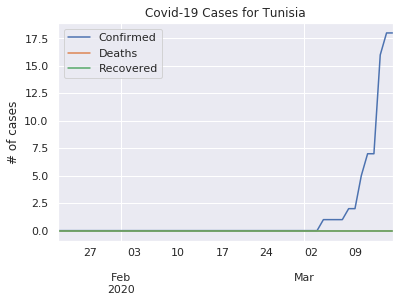

<Figure size 432x288 with 0 Axes>

In [307]:
figure = plot_cases("Tunisia")

In [308]:
figure.show()

In [310]:
china_all.to_csv("china_data.csv", index=True)

In [311]:
!touch app.py